In [43]:
import pandas as pd
lj_data = pd.read_csv('1_LJdata.csv')
lj_data.columns
#Index(['区域', '地址', '标题', '户型', '面积', '价格', '楼层', '建造时间', '朝向', '更新时间', '看房人数','备注', '链接地址'],dtype='object')
lj_data.columns = ['district', 'address', 'title', 'house_type', 'area', 'price', 'floor', 'build_time', 'direction', 'update_time', 'view_num', 'extra_info', 'link']

In [2]:
tmp_df2 = lj_data[['address','view_num']].groupby(['address']).count()
tmp_df2 = tmp_df2.reset_index()
tmp_df2.columns =  ['address','count']
tmp_df2.nlargest(columns='count', n=1)

,address,count
1288,远洋山水,19


In [4]:
tmp_df2 = lj_data[['address','view_num']].groupby(['address'],as_index = False).count()
tmp_df2.nlargest(columns='view_num', n=1)

,address,view_num
1288,远洋山水,19


In [9]:
lj_data[lj_data['address']=='远洋山水'].count()

district       19
address        19
title          19
house_type     19
area           19
price          19
floor          19
build_time     19
direction      19
update_time    19
view_num       19
extra_info     19
link           19
dtype: int64

In [10]:
def center_heating(x):
    return 1 if "集中供暖" in x else 0

lj_data.loc[:,'center_heating'] = lj_data['extra_info'].apply(lambda x:center_heating(x))
lj_data['center_heating'].value_counts()
lj_data[['center_heating','price']].groupby('center_heating').mean()

,price
center_heating,
0,7317.436975
1,7623.603327


In [13]:
lj_data.loc[:,'area'] = lj_data['area'].apply(lambda x:x[:-2]).apply(lambda x: float(x))
house_type_info = lj_data[['house_type','area']].groupby("house_type")\
.agg({"area":{'mean', 'max', 'min'}})

In [23]:
lj_data[lj_data['house_type']=='1室0厅'].ix[2544,'title']

e:\python\ai27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


'凯旋城 西南向的可办公房源 看房方便'

In [33]:
import re
#距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖
def find_sub_station(x):
    try:
        return re.search(pattern="距离(.+号线)(.+站)([0-9]+)米", string=x).group(1)
    except:
        return None
lj_data.loc[:,'sub_station'] = lj_data['extra_info'].apply(find_sub_station)
#统计
lj_data[['sub_station','link']].groupby('sub_station').count()

lj_data['extra_info'].apply(find_sub_station)

re.search(pattern="距离(.+号线)(.+站)([0-9]+)米", string='距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖').group(1)

'14号线'

In [34]:
def has_sub_station(x):
    return 1 if "距离" in x else 0

lj_data.loc[:,'has_sub_station'] = lj_data['extra_info'].apply(has_sub_station)

lj_data[['has_sub_station','price']].groupby('has_sub_station').agg('mean')

,price
has_sub_station,
0,6106.436464
1,8520.800478


In [35]:
#距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖
def cal_sub_station_distance(x):
    try:
        return int(re.search(pattern="(.+号线)(.+站)([0-9]+)米", string=x).group(3))
    except:
        return None

lj_data.loc[:,'distance'] = lj_data['extra_info'].apply(cal_sub_station_distance)

lj_data['distance'].mean()

709.1182364729459

In [36]:
lj_data['distance'].describe()

count    1497.000000
mean      709.118236
std       268.835024
min         1.000000
25%       512.000000
50%       736.000000
75%       911.000000
max      1198.000000
Name: distance, dtype: float64

In [42]:
lj_data

,district,address,title,house_type,area,price,floor,build_time,direction,update_time,view_num,extra_info,link,center_heating,sub_station,has_sub_station,distance
0,燕莎租房,新源街,亮马桥 新源街 精装两居 交通便利 看房方便 随时入住,2室1厅,50.0,5800,高楼层,1981年建板楼,南,2017.07.21,26,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101803342.html,1,None,0,NaN
1,望京租房,澳洲康都,澳洲康都东向精致两居室...........,2室1厅,79.0,7800,高楼层,2005年建板塔结合,东,2017.07.23,33,距离14号线(东段)东湖渠站731米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101753126.html,1,14号线,1,731.0
2,广安门租房,远见名苑,远见名苑 东向两居室 独立小区环境 适合居家,2室1厅,86.0,8000,高楼层,2006年建塔楼,东,2017.07.20,34,距离7号线达官营站684米 随时看房 精装修 自供暖,https://bj.lianjia.com/zufang/101101756753.html,0,7号线,1,684.0
3,天通苑租房,天通苑北一区,北一区简装两居，采光好，视野美，出行方便,2室1厅,103.0,5300,高楼层,2004年建板楼,东南,2017.07.25,30,距离5号线天通苑站927米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101780034.html,1,5号线,1,927.0
4,团结湖租房,团结湖北口,团结湖北口近地铁高楼层朝南向精装修正规两居室,2室1厅,63.0,6400,高楼层,1982年建塔楼,南,2017.07.26,30,距离10号线团结湖站88米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101781083.html,1,10号线,1,88.0
5,回龙观租房,龙华园,龙泽龙华园57平低楼层一居室家具家电齐全拎包入住,1室1厅,58.0,4000,高楼层,1994年建板楼,南,2017.07.23,61,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101748994.html,1,None,0,NaN
6,北苑租房,筑华年,筑华年西南小三居 靠谱出租 看房方便有钥匙,3室1厅,89.0,7500,高楼层,2012年建板楼,南,2017.07.25,29,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101767631.html,1,None,0,NaN
7,马甸租房,月季园,10号牡丹园站月季园小区 拎包入住 离梦想更近一点,2室1厅,53.0,6000,高楼层,1997年建塔楼,南,2017.07.16,26,距离10号线牡丹园站580米 随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101763532.html,1,10号线,1,580.0
8,小西天租房,今典花园,花园社区，西直门 今典花园精装两居，诚心出售。,2室1厅,73.0,8500,高楼层,2004年建塔楼,西,2017.07.23,44,随时看房 精装修 集中供暖,https://bj.lianjia.com/zufang/101101758850.html,1,None,0,NaN
9,北苑租房,北苑家园绣菊园,北苑东南两居室，可改三居 业主随时签约,2室1厅,82.0,5300,高楼层,2000年建塔楼,东南,2017.07.26,30,随时看房 集中供暖,https://bj.lianjia.com/zufang/101101779767.html,1,None,0,NaN


In [44]:
def get_floor(x):
    if '低楼层' in x:
        return '低楼层'
    elif '中楼层' in x:
        return '中楼层'
    else:
        return '高楼层'

lj_data.loc[:,'floor'] = lj_data['floor'].apply(get_floor)

In [45]:
lj_data.loc[:,'floor'].value_counts()

中楼层    1026
高楼层     936
低楼层     798
Name: floor, dtype: int64

In [50]:
pd.pivot_table(lj_data,index=["floor"])
pd.pivot_table(lj_data,index=["floor"],values=["price"],aggfunc='max')

,price
floor,
中楼层,35000
低楼层,210000
高楼层,45000


In [53]:
uniq = pd.read_csv('uniqco.csv')
uniq.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9


In [136]:
#透视表 看周中 周末 每一种商品 销售情况   quant 多少件  aggfunc聚合函数 求和
tmp = pd.pivot_table(uniq,index=['wkd_ind','product'],values=['quant'],aggfunc='sum')

quant
wkd_ind product       
Weekday T恤       10929
        当季新品      3178
        毛衣         787
        牛仔裤       1492
        短裤        1558
        袜子        2185
        裙子         568
        运动        1059
        配件        2790
Weekend T恤        7496
        当季新品      2160
        毛衣         569
        牛仔裤        940
        短裤        1263
        袜子        1454
        裙子         427
        运动         735
        配件        1832

In [61]:
tmp.loc[:,'avg']= [tmp.iloc[0,0]/5,tmp.iloc[1,0]/2]

In [62]:
tmp

,quant,avg
wkd_ind,,
Weekday,24546,4909.2
Weekend,16876,8438.0


In [68]:
tmp = pd.pivot_table(uniq,index=['product'],values=['quant','revenue','order','customer'],aggfunc='sum')

In [71]:
tmp.sort_values('quant',ascending = False)

,customer,order,quant,revenue
product,,,,
T恤,16592,16792,18425,1538744.84
当季新品,4685,4835,5338,590664.88
配件,3917,3983,4622,444685.15
袜子,2756,2775,3639,127731.36
短裤,2366,2375,2821,107485.88
牛仔裤,2267,2292,2432,246127.48
运动,1521,1538,1794,118059.68
毛衣,1248,1258,1356,245630.80
裙子,974,980,995,137302.78


In [77]:
tmp1 = tmp.reset_index()

In [81]:
tmp1 = tmp1.sort_values('quant',ascending = False)

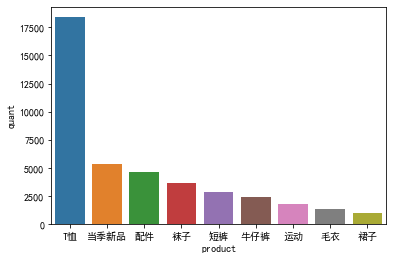

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x='product',y='quant',data=tmp1)

In [83]:
# 看销量和 成本之间的关系 
q2=['revenue','unit_cost']
#计算皮尔逊相关系数
uniq[q2].corr()

,revenue,unit_cost
revenue,1.00000,0.14844
unit_cost,0.14844,1.00000


In [84]:
# uniq.corr() 计算皮尔逊 所有列 两两计算皮尔逊相关系数
uniq.corr()

,store_id,customer,revenue,order,quant,unit_cost
store_id,1.000000,-0.050900,-0.044005,-0.051505,-0.049710,0.020736
customer,-0.050900,1.000000,0.829121,0.995098,0.916198,0.012111
revenue,-0.044005,0.829121,1.000000,0.842665,0.841883,0.148440
order,-0.051505,0.995098,0.842665,1.000000,0.923915,0.013701
quant,-0.049710,0.916198,0.841883,0.923915,1.000000,-0.023741
unit_cost,0.020736,0.012111,0.148440,0.013701,-0.023741,1.000000


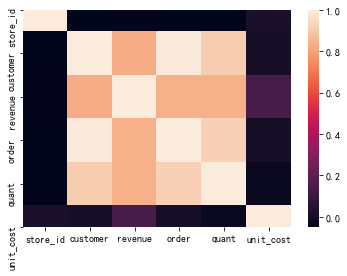

In [85]:
sns.heatmap(uniq.corr())

In [89]:
uniq.pivot_table(uniq,index='gender_group',columns=['product'],aggfunc='count')

age_group                                                      \
product             T恤    当季新品     毛衣     牛仔裤     短裤      袜子     裙子     运动   
gender_group                                                                 
Female          6946.0  1504.0  454.0  1062.0  871.0  1250.0  468.0  593.0   
Male            3613.0  1030.0  352.0   336.0  810.0   791.0  161.0  380.0   
Unkown            51.0     6.0    1.0    14.0   13.0    12.0    NaN    3.0   

                     channel  ... unit_cost wkd_ind                         \
product           配件      T恤  ...        配件      T恤    当季新品     毛衣     牛仔裤   
gender_group                  ...                                            
Female        1060.0  6946.0  ...    1060.0  6946.0  1504.0  454.0  1062.0   
Male           494.0  3613.0  ...     494.0  3613.0  1030.0  352.0   336.0   
Unkown          18.0    51.0  ...      18.0    51.0     6.0    1.0    14.0   

                                                   
product          短裤      袜子     裙子     运动      配件  
gender_group                                       
Female        871.0  1250.0  468.0  593.0  1060.0  
Male          810.0   791.0  161.0  380.0   494.0  
Unkown         13.0    12.0    NaN    3.0    18.0  

[3 rows x 90 columns]

In [91]:
uniq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 12 columns):
store_id        22293 non-null int64
city            22293 non-null object
channel         22293 non-null object
gender_group    22293 non-null object
age_group       22293 non-null object
wkd_ind         22293 non-null object
product         22293 non-null object
customer        22293 non-null int64
revenue         22293 non-null float64
order           22293 non-null int64
quant           22293 non-null int64
unit_cost       22293 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 2.0+ MB


In [117]:
male = uniq[uniq['gender_group']=='Male']
#app1=app[app['price']<=9.99]
#直方图，APP价格的分布

uniq.groupby(['age_group','gender_group']).count().sort_values('store_id',ascending = False)
tmp2 = pd.pivot_table(uniq,index='age_group',columns=['gender_group'],aggfunc='count')['channel']

In [121]:
tmp3 = tmp2.reset_index()

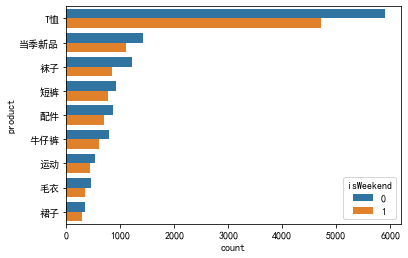

In [148]:
#添加一个 isWeekend 是否是周末这一列 
uniq.loc[:,'isWeekend'] = uniq['wkd_ind'].apply(lambda x: 1 if x=='Weekend' else 0)
# 数记录的条数 
sns.countplot(y='product',hue='isWeekend',data=uniq,order=uniq['product'].value_counts().index)

In [151]:
uniq.groupby('age_group')['channel'].value_counts()

age_group  channel
20-24      线下         2783
           线上          562
25-29      线下         3418
           线上          806
30-34      线下         3650
           线上          776
35-39      线下         3092
           线上          599
40-44      线下         1612
           线上          343
45-49      线下          902
           线上          193
50-54      线下          567
           线上          105
55-59      线下          439
           线上           75
<20        线下          545
           线上          115
>=60       线下         1288
           线上          286
Unkown     线下          107
           线上           30
Name: channel, dtype: int64

In [144]:
uniq.loc[:,'isOnline'] = uniq['channel'].apply(lambda x: 1 if x=='线上' else 0)

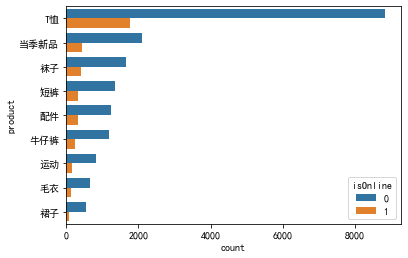

In [145]:
sns.countplot(y='product',hue='isOnline',data=uniq,order=uniq['product'].value_counts().index)

In [146]:
uniq['product'].value_counts()

T恤      10610
当季新品     2540
袜子       2053
短裤       1694
配件       1572
牛仔裤      1412
运动        976
毛衣        807
裙子        629
Name: product, dtype: int64

In [131]:
uniq

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,isM
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,0
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,0
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,1
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,0
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,1
5,28,武汉,线上,Female,35-39,Weekend,T恤,1,97.0,1,1,49,0
6,649,杭州,线下,Female,25-29,Weekend,短裤,1,33.0,1,1,19,0
7,520,杭州,线下,Male,>=60,Weekend,T恤,2,158.0,2,2,49,1
8,649,杭州,线下,Female,30-34,Weekend,牛仔裤,3,157.0,3,3,69,0
9,21,北京,线下,Female,45-49,Weekend,毛衣,1,199.0,1,1,99,0


In [128]:
uniq.loc[:,'isM'] = uniq['gender_group'].apply(lambda x: 1 if x=='Male' else 0)

In [ ]:
sns.barplot(x='prime_genre',y='user_rating',hue='paid',data=app5)

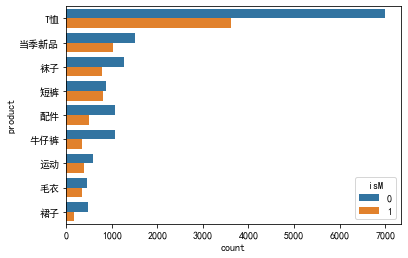

In [134]:
uniq['gender_group'].value_counts().index

sns.countplot(y='product',hue='isM',data=uniq,order=uniq['product'].value_counts().index)

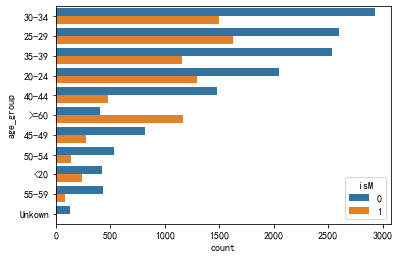

In [135]:
sns.countplot(y='age_group',hue='isM',data=uniq,order=uniq['age_group'].value_counts().index)